# Application of machine learning to the Fermi unassociated sources
                

<h5 style="text-align:right; margin-right:15px"> 2023-08-10 17:16</h5>

## Outline
**Goal: use predictive artificial intelligence to classify source types of the unid's**

Procedure:
* Choose the standard `scikit-learn` ML implementation 
* Choose "features"
* Evaluate classifier options, select one
* Validate, perhaps adjust feature set
* Apply to the unid's (including "SGU"s)

The "features" that can be used for population analysis.

| Feature   | Description 
|-------    | ----------- 
|`eflux`    | Energy flux for E>100 Mev, in erg cm-2 s-1 
|`pindex`   | Spectral index (problematical since defined differently for PLEX and LP)
|`curvature`| Spectral curvature, twice the log-parabola parameter $\beta$
|`e0`       | Spectral scale energy, close to the "pivot"
|`epeak`    | $E_p$, Energy of SED maximum. limited to (100 MeV-1TeV)
|`fpeak`    | $F_p$,  differential flux, in eV s-1 cm-2, at `epeak`
|`sin_b`    | $\sin(b)$, where $b$ is the Galactic latitude 
|`var`      | `Variability_Index` parameter from 4FGL-DR4 
|`nbb`      | Number of Bayesian Block intervals from the wtlike analysis 
 

* Values and counts of the `association` column

Note that the number of pulsar+blazars (including bcu) is 93% of the total
associated.

### Variability measures: nbb vs variability
        

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa19d88b460>
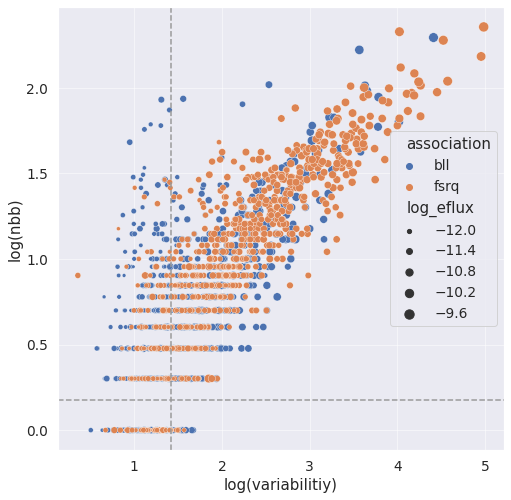

**➜** Choose `nbb` since it detects BL Lac variability missed by 4FGL
        

## Examine correlations among selected features
        

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa19ddea950>
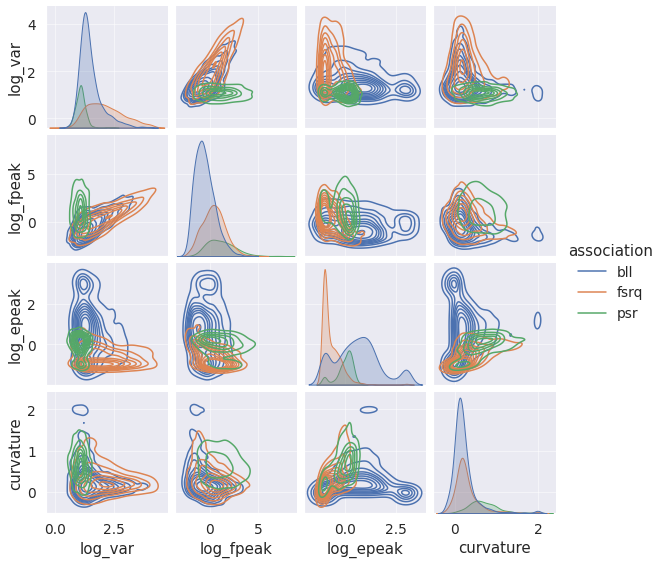

## Classifiers
This is an effort led by my student Timothy Tomter
The full list that was considered was

['Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost', 'Naive Bayes', 'QDA']

Scores for the two best are shown here:
    

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa19d9166b0>
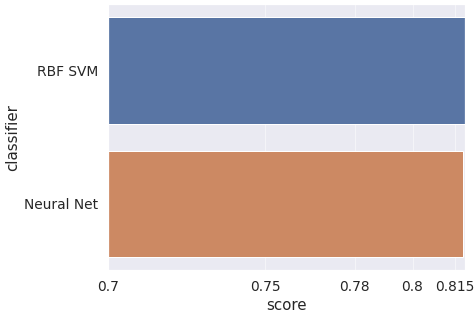

We chose the first, a Support Vector Classifier

### Confusion analysis, test size = 25.0 %
* Model: SVC(C=1, gamma=2)<br>
* Features: ['log_var', 'log_fpeak', 'log_epeak', 'curvature']<br>
Accuracy: 87%

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa16a841270>
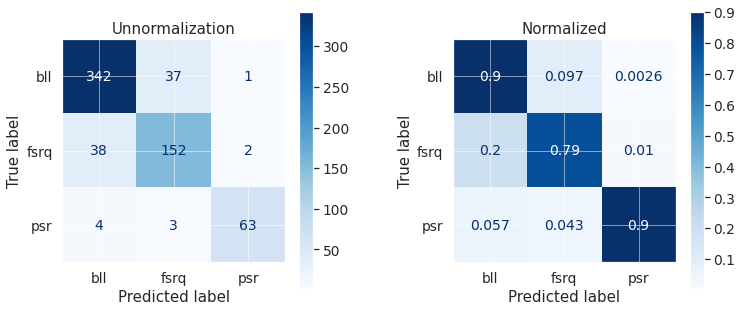

## Predictions
        

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa16a617a00>
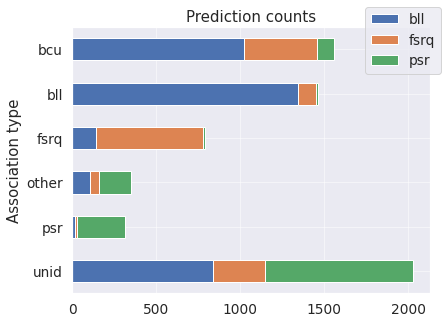

Notes:
* The target is the unids, but applied to all
* BCUs mostly blazars, a check
* BLL, FSRQ, Pulsar look OK (a little redundant), a check

### Curvature vs $E_p$: compare training and unid sets

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa16a4ab3d0>
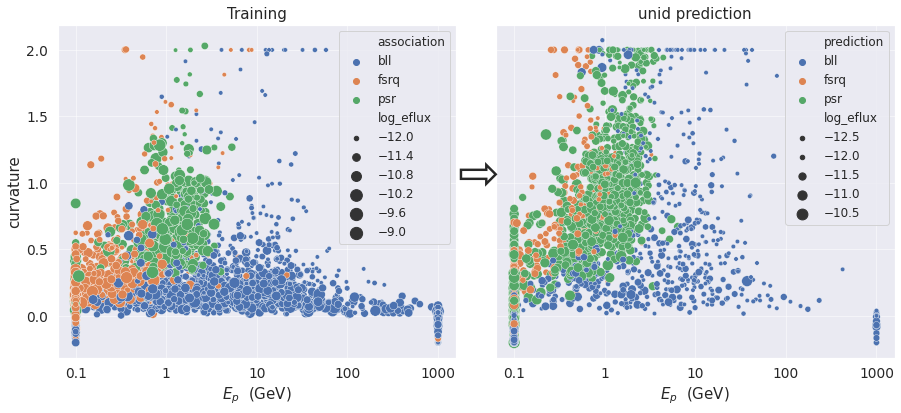

Note that the curvature distribution is shifted to higher values for the unid 
data.

### Curvature vs. $F_p$
Check the dependence of the curvature on the peak flux.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa16a3e95d0>
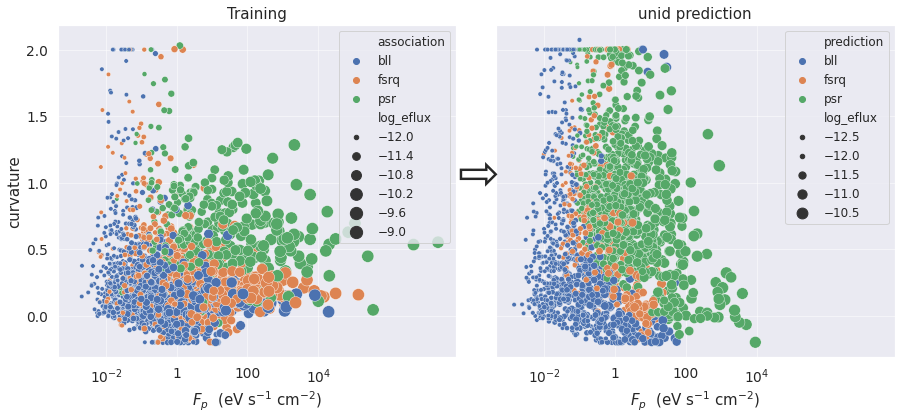

## What about the  413 SGU sources?

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa16a57af50>
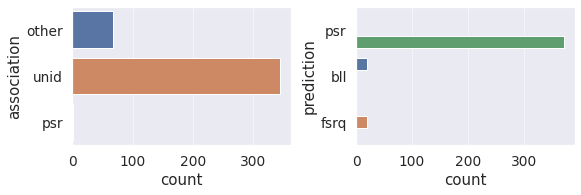

Conclusion: mostly pulsars!

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa16a186e00>
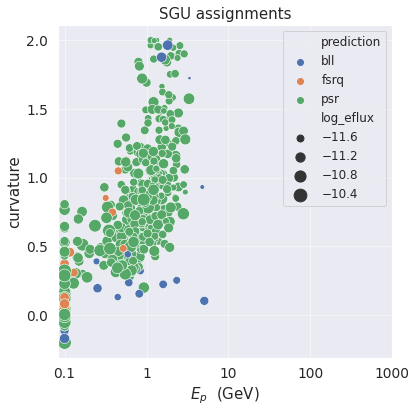

## Notes, todos:
* Reexamine feature set using random forest importance measures
* Check sky positions--are they consistent with presumed counterpart catalog detection efficiencies and
expected source distributions? Perhaps include it in the training after accounting for efficiency<br>
* Perhaps expand the "other" category, e.g. SNRs
* Check some of the individual ones brought up here

# Analysis of spectral curvature

<h5 style="text-align:right; margin-right:15px"> 2023-08-10 17:16</h5>

It is clear from the [ML studies](machine_learning.ipynb) that the spectral curvature plays an important role.
 In this section we study this variable in detail. We have been using the UW determination, so here we look at
 how it was measured for the UW all-sky analysis as well as the public 4FGL-DR4. 
 

## Curvature distributions 
The spectral curvature is defined as the negative of the second derivative of the SED distribution
in log-log space. For the common log-parabola (LP) spectral function it is $2\beta$. Pulsars are fit
with a power-law exponential cutoff form (PLEC). For these we evaluate the curvature at the reference energy. 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa15bc49de0>
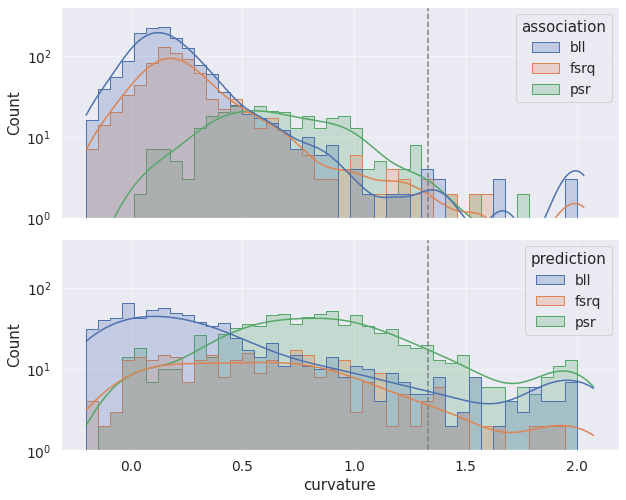

An assumption might be that unassociated sources are one of the three major types, 
which account for 95% of all associated sources. However, the shapes of the predicted distributions 
are not consistent with a simple linear combination of the associated counterparts. This is 
dramatically true for the pulsars, which we expect to be limited by the physical bound of 4/3.
The presence of a new source type calls the assignment into question. In the following map, we show 
all unid sources with curvature>4/3. 

### Positions of 241 curvature>4/3 unassociated sources.
Since only 12 of the actual pulsars satisfy this, there should be few undetected pulsars.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa16a5cb4c0>
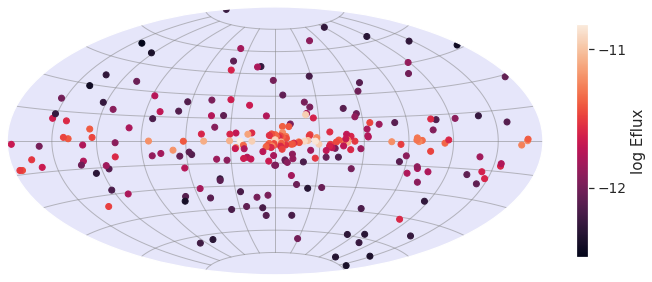

The galactic positions and strong correlation of flux with latitude makes it clear that these are mostly 
of galactic origin. 

## Curvature measurement details
### Role of measurement error
There are two issues to consider:
1. The unassociated sources tend to be weaker, unassociated perhaps because they were harder to detect 
in other wavelengths--this means that statistical errors for spectral details are larger. For pulsars, larger error 
circles make radio searches more difficult.
2. Higher curvatures have intrinsically larger errors

### The UW and 4FGL measurement uncertainties

* UW: The fit procedure optimized curvatures individually for each source, limiting the value to 2. 
There were some sources for which the fit was not done, or apparently failed.
Of the 6496 sources there were 76 with the error set to zero and  903 set to 2. 

* 4FGL: The log-parabola curvature parameter $\beta$ (which is 1/2 the spectral curvature) 
was optimized along with the other spectral parameters, but, new for DR4, the likelihood included a
prior Gaussian with mean 0.1 and width 0.3. So two sigmas is at 0.7, or curvature=1.4, suppressing 
high curvatures as designed.
See Section 3.4 of the [4FGL-DR4 paper]](https://arxiv.org/pdf/2307.12546.pdf))

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa16a1d1420>
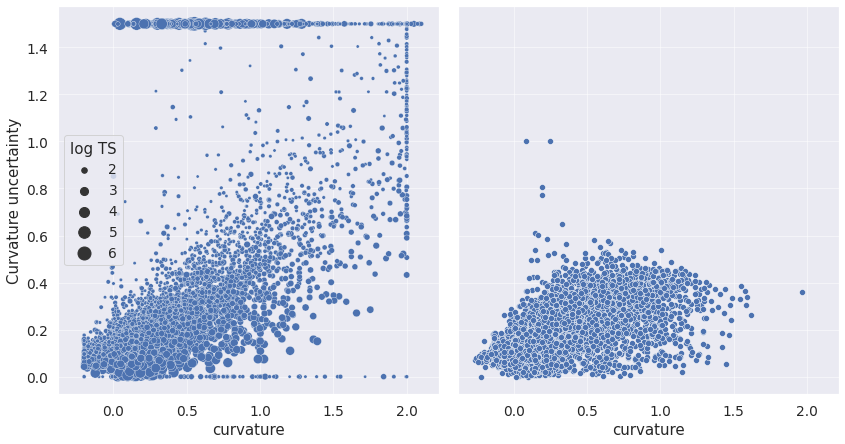

### Compare UW and 4FGL curvatures
For this comparison we determined the `fgl_comparison` parameter using a numerical second derivative
of its preferred spectral function, evaluated at the reference energy. 
This puts LP and PLEC on the same basis. (The UW curvature was determined the same way.)

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa15bc8a1a0>
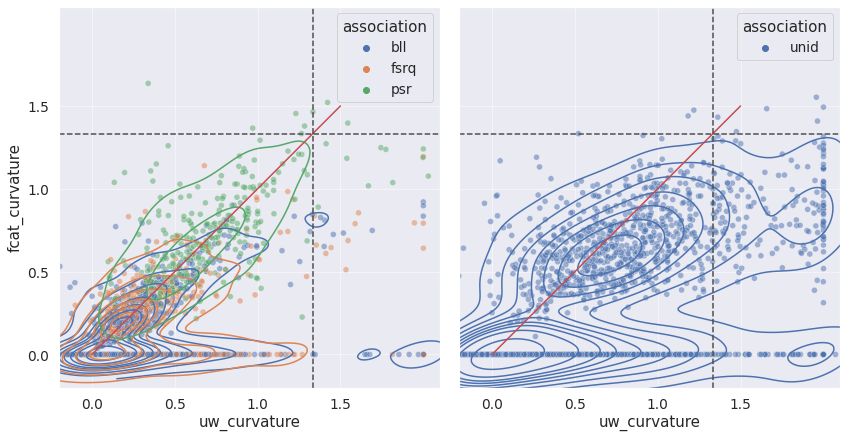

The points along the y-axis are the cases in which the preferred 4FGL spectrum is a power-law.
this happens (1215 / 2566,  881 / 2027) of the time for the two cases.
For "ordinary" sources, left panel, the correspondence is reasonable, but for many unassociated sources the 4/3 
4FGL $0.2 \pm 0.6$ prior distorts the relationship.
    

### Compare $\beta$ and $d$ for pulsars
Since pulsars are fit to both PLEC and LP spectra, this is a check on
the correspondence of the respective curvature parameters.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa168c42890>
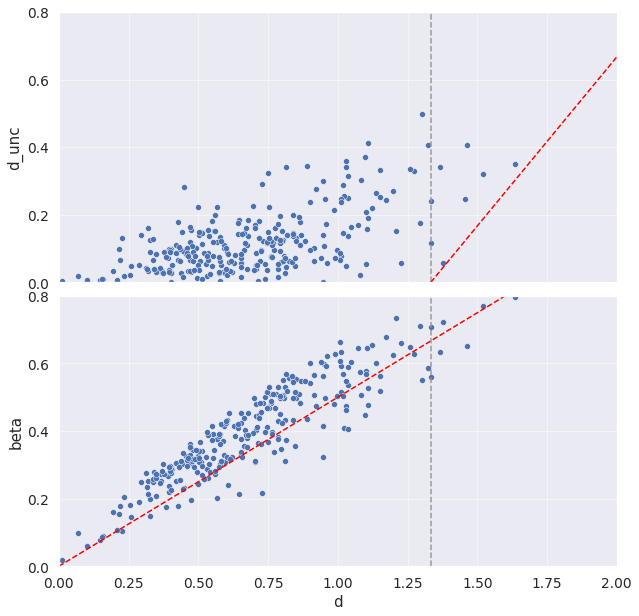

## Planar/Polar unid estimate

The galactic component of the UNIDs revealed by the high-curvature analysis suggests the presence of many hundreds of
sources of a previously unknown type.

Here we make a crude estimate of how many there might be by using latitudes, comparing the 
     planar ($|b|<30^\circ$) and polar populations.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa168ce3a30>
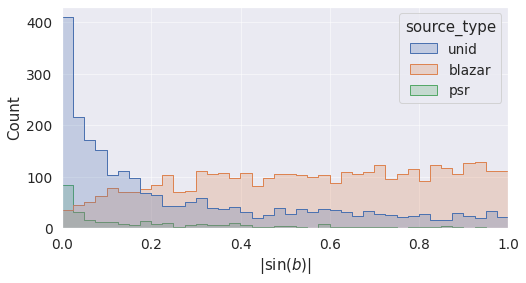

Assuming that all high-latitude UNID's are blazars, estimate the galactic component.
        

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa15be66860>

From the table, we estimate that the number of undetected blazars in the planar region is 535.
Then, assuming that the distribution of blazars in the unid is uniform, the net galactic 
unids in planar region is 743.
This would also contain undetected pulsars.

## Summary
There are two strong indicators that the Fermi-LAT data contain many hundreds of an unknown 
new galactic source of gamma-rays, easily more than the ~300 gamma-ray pulsars
* Figure 1 shows that ordinary sources are consistent with the monoenergetic curvature radiation spectrum
limit of 4/3, while many of the unid sources do not
* Figure 2 makes if very clear that there is a correlation between high curvature and galactic position.

The study of the actual measurements of curvature, Figures 3 and 4, show that the fit procedures for the UW spectral fits 
used here differ in a dramatic way from what was used for the 4FGL-DR4 catalog: The latter fits were engineered 
to suppress this effect.
 
A reality check, the latitude estimate accompanying Figure 6 of 743 galactic unids appears consistent. 

Further steps to validate and refine this:
* Careful gtlike LP fits to a set of these, without the catalog's curvature constraint of course
* Referring to Figure 1, there appear to be very many down to lower curvatures. With the ML predictions and the source 
positions as a guide, it should be possible to recover them, and more generally, account for all unids at least statistically.

In [1]:
%run pylib/curvature main